# Gather Data

## Imports

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from config import MAIN_PALETTE

sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.rcParams["figure.figsize"] = (15,5)

## Get Data

In [283]:
data_path = '../data/dataset01.csv'
data = pd.read_csv(data_path)

data.head()

,state,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,...,volt_991,volt_992,volt_993,volt_994,volt_995,volt_996,volt_997,volt_998,volt_999,volt_1000
0,0,0.717573,0.714725,0.704585,0.694305,0.687011,0.683188,0.682031,0.682287,0.682855,...,22.574360,22.291788,22.200832,22.117663,21.933806,21.704434,21.518837,21.423986,21.415594,21.471398
1,0,0.719402,0.717330,0.708022,0.698305,0.691041,0.686480,0.683860,0.682345,0.681356,...,21.606304,21.749150,21.913914,22.131298,22.423522,22.622597,22.538945,22.260577,21.968238,21.749753
2,0,0.723090,0.721113,0.711632,0.701274,0.692945,0.687295,0.683872,0.682021,4.548630,...,21.920634,22.191567,22.503530,22.636686,22.477095,22.179683,21.903873,21.712412,21.651748,21.751566
3,0,0.729627,0.726485,0.715613,0.704214,0.695404,0.689836,0.686908,0.685656,0.685570,...,21.762202,21.882131,21.835883,21.622620,21.348106,21.087030,20.890951,20.803209,20.818334,20.924658
4,0,0.714636,0.714388,0.706626,0.698127,0.691818,0.688184,0.686566,0.686016,0.685919,...,22.371510,22.625730,22.591585,22.306095,21.983154,21.734184,21.610245,21.653387,21.830623,21.990501


#### Important info

In [284]:
na_values = data.isna()

print(f'Total NaN values: {na_values.sum().sum()}')

Total NaN values: 23


Check NaN values for each State

In [285]:
na_values['state'] = data['state']
na_values.groupby('state').sum().sum(axis=1)

state
0    13
1     3
2     7
dtype: int64

See which values are missing

In [286]:
# [print(x, i) for x, i in na_values.groupby('state').sum().sum()]
a = na_values.groupby('state').sum().sum()

for (index_, value) in zip(a.index, a):
    if value > 0:
        print(index_, value)

current_6 1
current_10 1
current_17 1
current_19 1
current_456 1
current_457 1
current_469 1
current_499 1
current_600 1
current_602 1
current_640 1
current_644 1
current_645 1
current_649 1
volt_144 1
volt_147 1
volt_155 1
volt_160 1
volt_981 1
volt_982 1
volt_985 1
volt_995 1
volt_1000 1


There is no recognizable pattern of which are the NaN values for now.
As there are very few NaN values, we will imput the mean values of each row into the missing values

In [287]:
def starts_curr(stri: str):
    return stri.startswith('current_')

def starts_volt(stri: str):
    return stri.startswith('volt_')

data['mean_curr'] = np.nanmean(data.iloc[:, 1: 1001], axis=1)
data['mean_volt'] = np.nanmean(data.iloc[:, 1001: 2001], axis=1)
    

In [288]:
target_columns = ['state', 'mean_curr', 'mean_volt']

df_filters = data.filter(items=target_columns)

df_filters

,state,mean_curr,mean_volt
0,0,0.683705,22.151397
1,0,0.679833,22.066898
2,0,0.690525,22.070464
3,0,0.692794,22.012264
4,0,0.680013,22.076911
...,...,...,...
495,2,0.685177,22.086528
496,2,0.692129,22.053290
497,2,0.690922,22.061742
498,2,0.686268,22.079134


Check mean by state

In [289]:
df_filters

,state,mean_curr,mean_volt
0,0,0.683705,22.151397
1,0,0.679833,22.066898
2,0,0.690525,22.070464
3,0,0.692794,22.012264
4,0,0.680013,22.076911
...,...,...,...
495,2,0.685177,22.086528
496,2,0.692129,22.053290
497,2,0.690922,22.061742
498,2,0.686268,22.079134


In [290]:
df_0 = df_filters.query('state == 0').reset_index()
df_1 = df_filters.query('state == 1').reset_index()
df_2 = df_filters.query('state == 2').reset_index()

filtered_dfs = [df_0, df_1, df_2]
df_0

,index,state,mean_curr,mean_volt
0,0,0,0.683705,22.151397
1,1,0,0.679833,22.066898
2,2,0,0.690525,22.070464
3,3,0,0.692794,22.012264
4,4,0,0.680013,22.076911
...,...,...,...,...
295,295,0,0.647469,22.173860
296,296,0,0.648293,22.180751
297,297,0,0.646802,22.175724
298,298,0,0.646597,22.185222


Now, lets get some results from each state

In [291]:
## State 0
df_0.describe()

,index,state,mean_curr,mean_volt
count,300.000000,300.0,300.000000,300.000000
mean,149.500000,0.0,0.689042,22.045448
std,86.746758,0.0,0.019199,0.062667
min,0.000000,0.0,0.645952,21.907874
25%,74.750000,0.0,0.676967,21.998547
50%,149.500000,0.0,0.687605,22.049519
75%,224.250000,0.0,0.705582,22.086048
max,299.000000,0.0,0.730227,22.192901


In [292]:
## State 1
df_1.describe()

,index,state,mean_curr,mean_volt
count,100.000000,100.0,100.000000,100.000000
mean,349.500000,1.0,0.891397,21.676799
std,29.011492,0.0,0.026937,0.159023
min,300.000000,1.0,0.827391,21.393575
25%,324.750000,1.0,0.883240,21.618922
50%,349.500000,1.0,0.898705,21.681065
75%,374.250000,1.0,0.909135,21.738536
max,399.000000,1.0,0.931605,22.885971


In [293]:
## State 2
df_2.describe()

,index,state,mean_curr,mean_volt
count,100.000000,100.0,100.000000,100.000000
mean,449.500000,2.0,0.702424,22.034791
std,29.011492,0.0,0.029462,0.076218
min,400.000000,2.0,0.625332,21.919028
25%,424.750000,2.0,0.690650,21.982530
50%,449.500000,2.0,0.712746,22.008827
75%,474.250000,2.0,0.725433,22.055605
max,499.000000,2.0,0.754622,22.219782


Clearly, the current mean of state 0 and 2 are very similar while in state 0 the mean value of current is a little higher.

Lets check how are those values distributed in a Boxplot

[Text(0.5, 1.0, 'Distribution of average current')]

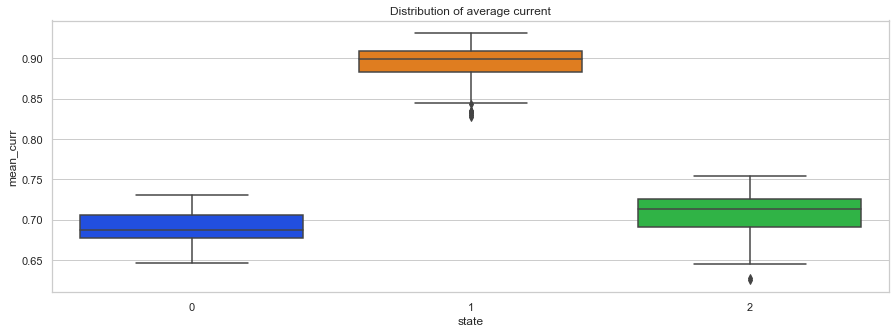

In [294]:
sns.boxplot(data=data, x="state", y="mean_curr").set(title=f'Distribution of average current')

The median of the mean values of current is lower in the state 0.

[Text(0.5, 1.0, 'Distribution of average voltage')]

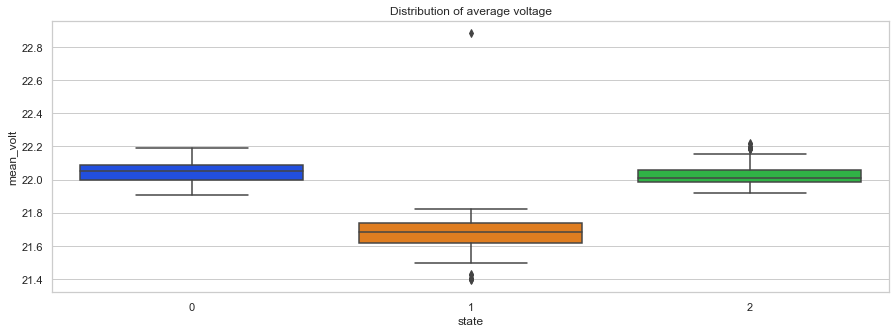

In [295]:
sns.boxplot(data=df_filters, x="state", y="mean_volt").set(title=f'Distribution of average voltage')

The median and the distribution of mean values for state 1 are very diferent from the others

Lets check how are those values distributed in a Histogram

In [296]:
def plot_hist_for_df(df):
    for column in df_filters.columns[-2:]:
        sns.histplot(data=df, hue='state', x=column, palette=MAIN_PALETTE)
        plt.show()

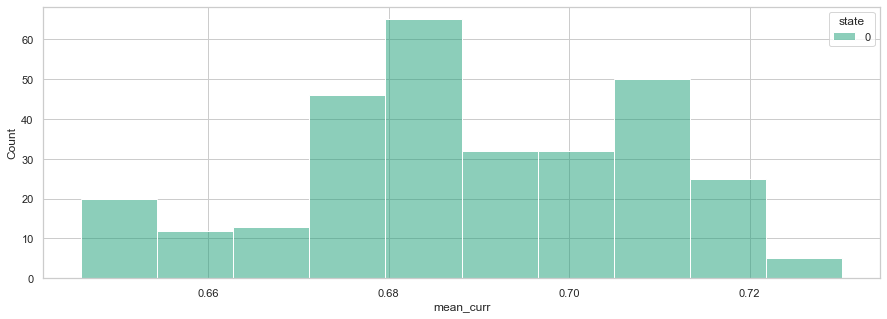

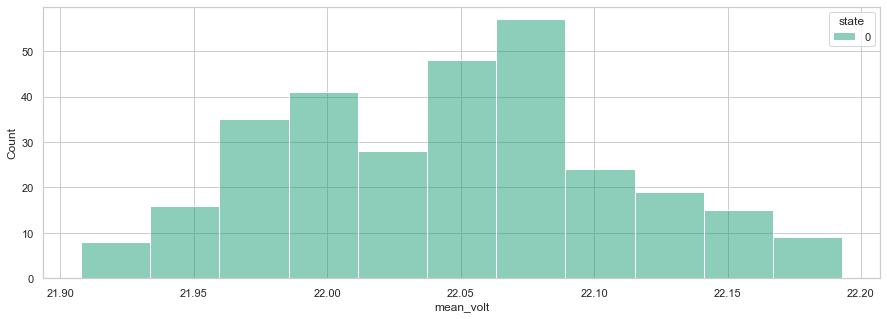

In [297]:
plot_hist_for_df(df_0)

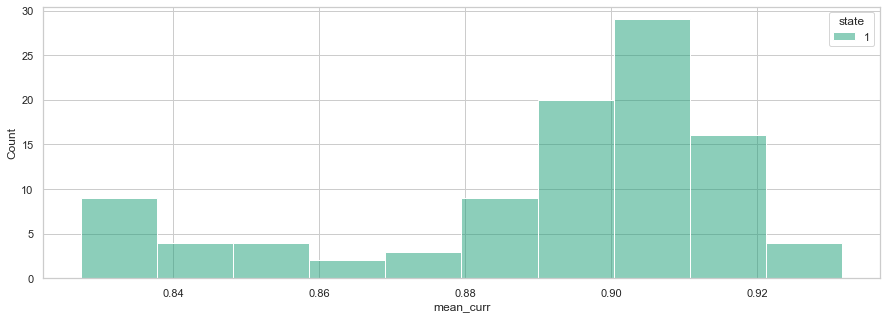

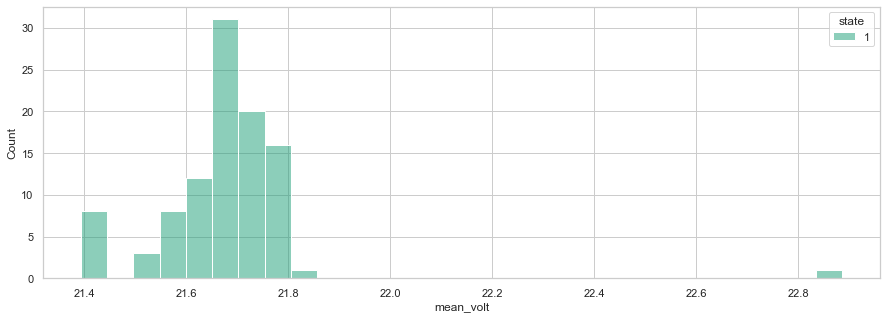

In [298]:
plot_hist_for_df(df_1)

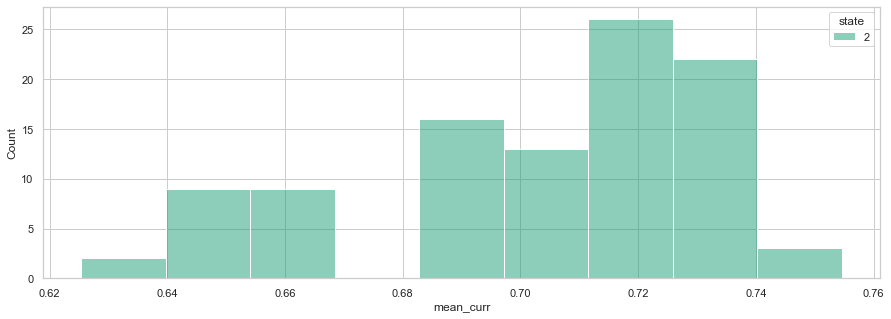

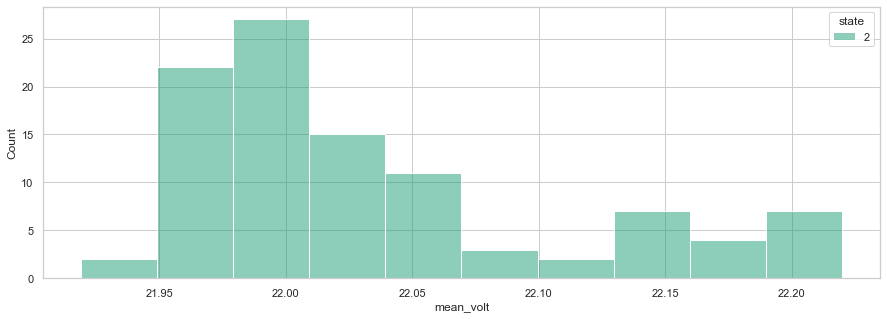

In [299]:
plot_hist_for_df(df_2)

All the histograms showed that the data is mainly centered in the median, with a very low frequency for other values.

Lets watch how the mean values are distributed along the dataset

<AxesSubplot:xlabel='mean_volt', ylabel='mean_curr'>

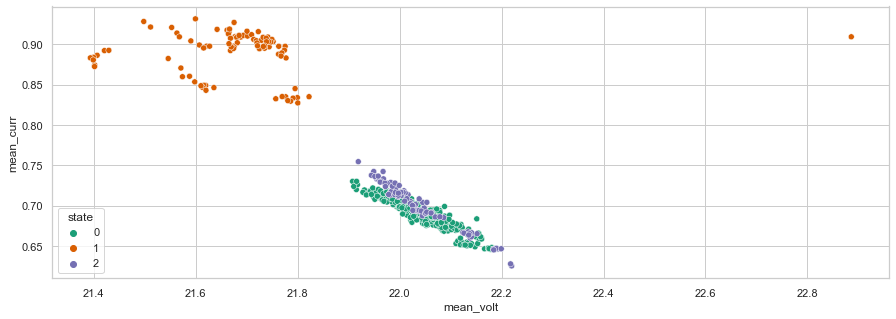

In [300]:
sns.scatterplot(data=df_filters, x="mean_volt", y="mean_curr", hue="state", palette=MAIN_PALETTE)

Now, let's watch the behaviour of the features current and voltage for a single row of each state.

In [301]:
def behaviour_plot(state, target, init=1, final=1001):
    df_state = data.query(f'state == {state}').reset_index()
    row = df_state.iloc[5]
    df_print = {
        "current": list(row[init:final]),
        "volt": list(row[1001+init:1001+final]),
    }
    df_print = pd.DataFrame(df_print)
    fig, axs = plt.subplots(ncols=2)
    sns.lineplot(data=df_print[target], ax=axs[0]).set(title=f'State {state} - {target} Behaviour')
    sns.histplot(data=df_print, x=target, ax=axs[1]).set(title=f'State {state} - {target} Histogram')
    plt.show()
    # plt.clf()

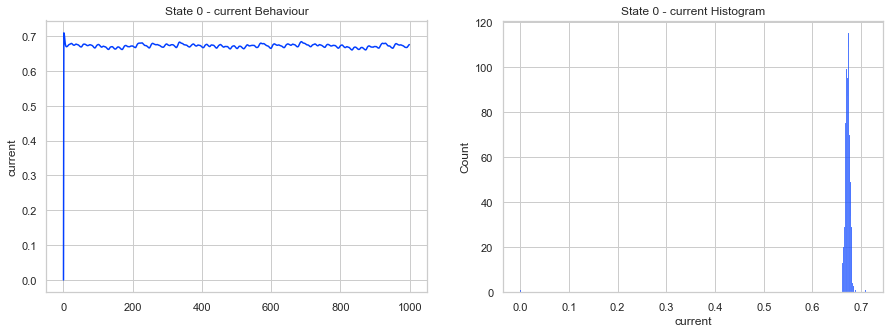

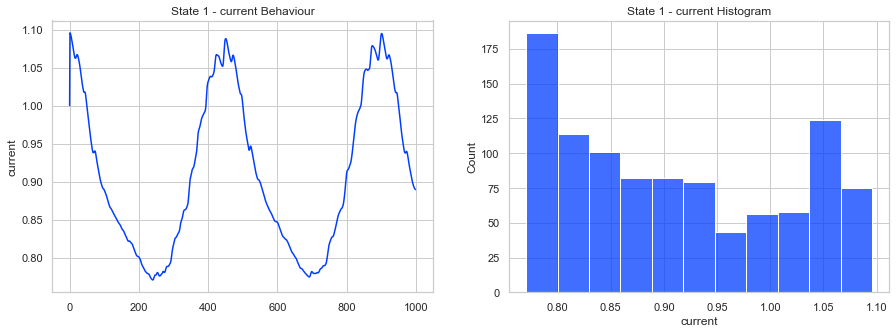

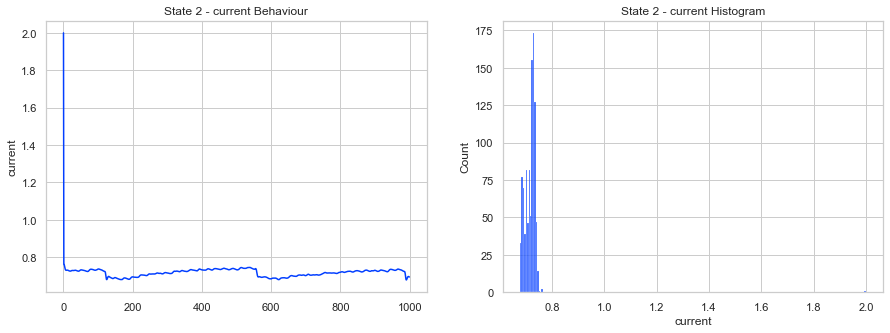

In [302]:
for state in range(3):
    behaviour_plot(state, 'current')

The results showed a huge difference between the behaviours of the current for each state.

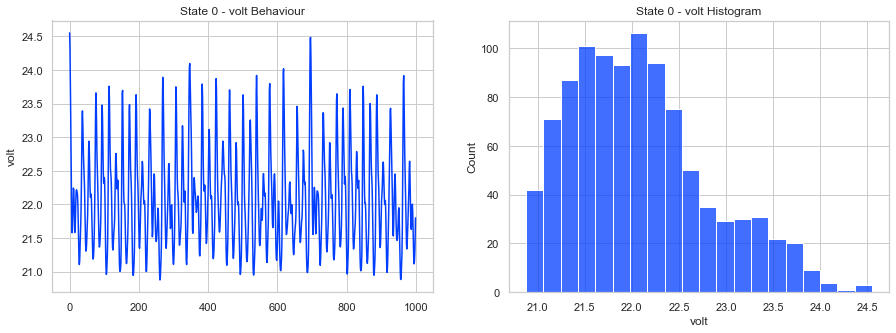

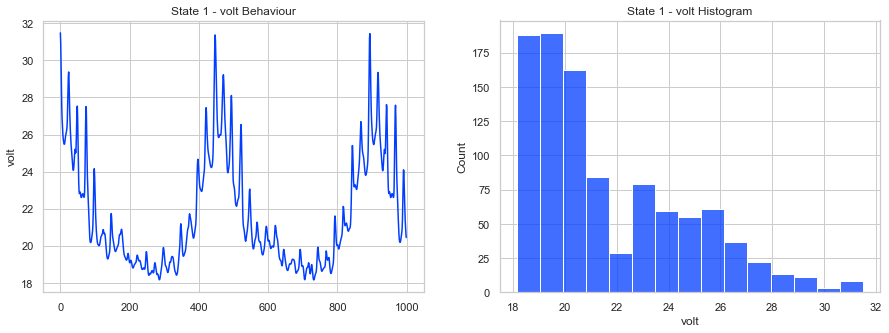

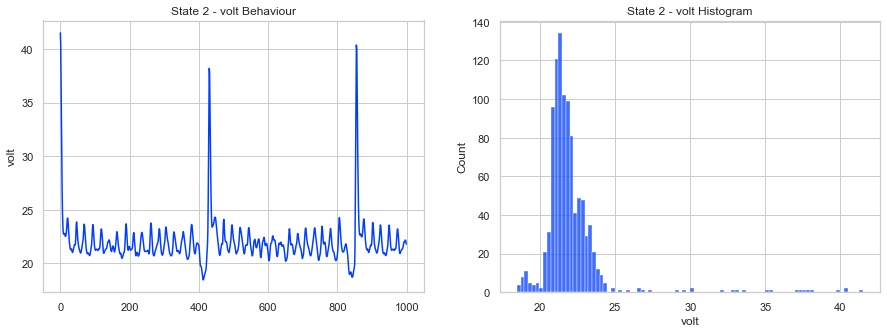

In [303]:
for state in range(3):
    behaviour_plot(state, 'volt')

The results showed a huge difference between the behaviours of the voltage for each state.

Also, we concluded that there is a cycle in the behaviours. A max point and min point well defined, then the same behaviour again. Lets remove the initial and the end parts and choose only the 200 to 800 measurements.

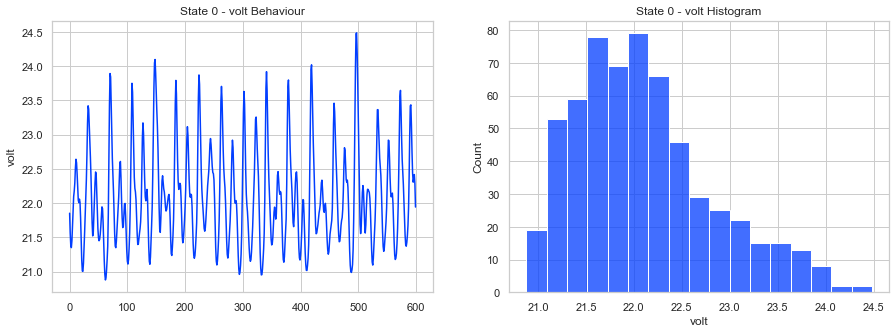

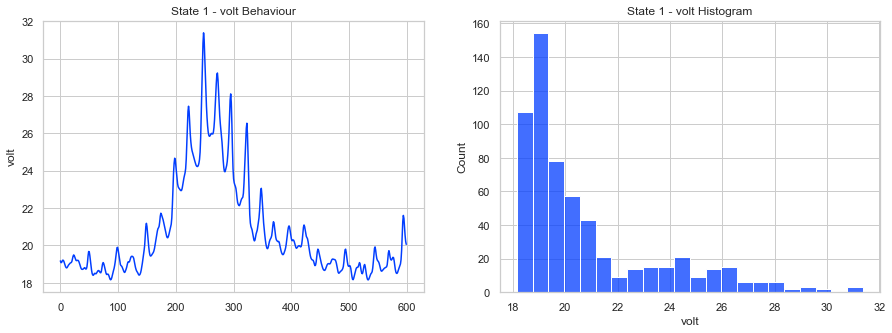

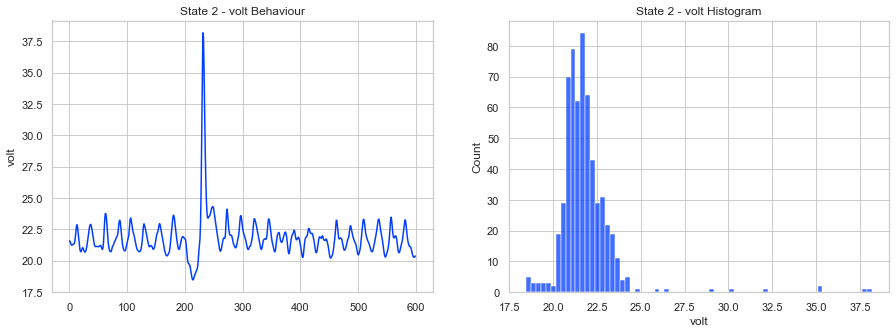

In [304]:
for state in range(3):
    behaviour_plot(state, 'volt', init=200, final=800)

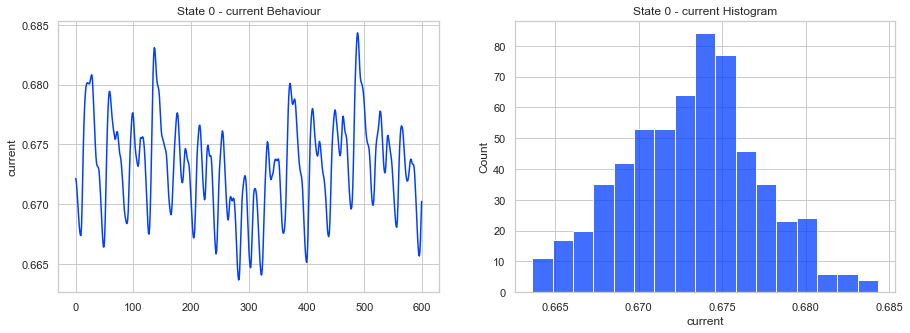

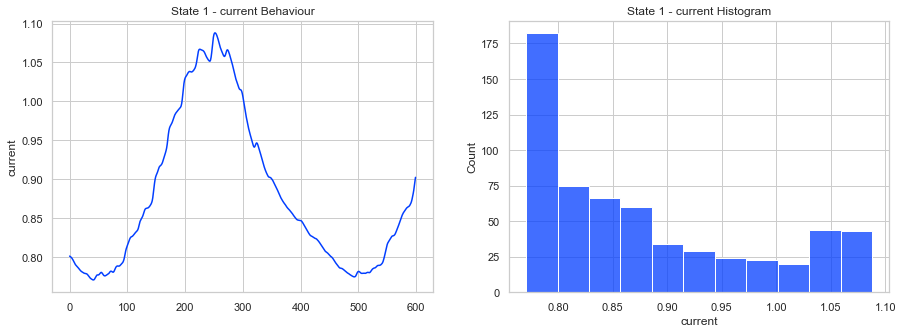

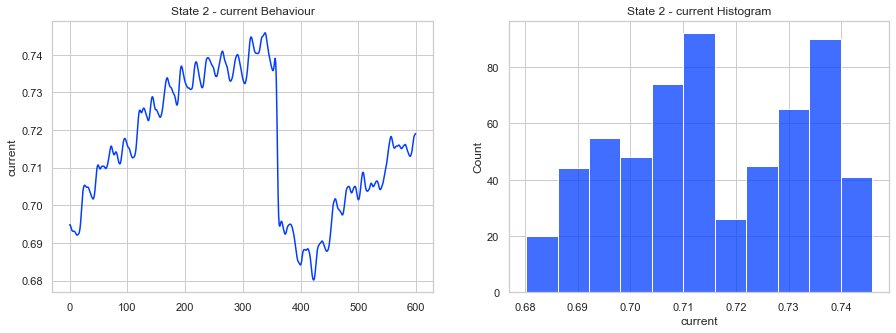

In [305]:
for state in range(3):
    behaviour_plot(state, 'current', init=200, final=800)

The behaviour remained pretty different from each other and now the size of the problem is a lot less complex.